In [1]:
!pip show pmdarima


Name: pmdarima
Version: 2.0.4
Summary: Python's forecast::auto.arima equivalent
Home-page: http://alkaline-ml.com/pmdarima
Author: 
Author-email: 
License: MIT
Location: /Users/vyadav/Library/Python/3.9/lib/python/site-packages
Requires: Cython, joblib, numpy, packaging, pandas, scikit-learn, scipy, setuptools, statsmodels, urllib3
Required-by: 


In [2]:
!pip install cufflinks


Defaulting to user installation because normal site-packages is not writeable


In [3]:
import pandas as pd
import statsmodels.api as sm
import statsmodels as smt
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
import chart_studio.plotly as ply
import cufflinks as cf
cf.go_offline()

/Users/vyadav/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [4]:
import pandas as pd

df_sea_level = pd.read_csv('/Users/vyadav/Downloads/csiro_alt_gmsl_mo_2015_csv.csv')
df_sea_level.head()

,Time,GMSL
0,1993-01-15,-1.6
1,1993-02-15,-3.4
2,1993-03-15,5.5
3,1993-04-15,0.1
4,1993-05-15,5.3


In [5]:
df_sea_level.rename(columns = {'GMSL\r':'GMSL'}, inplace = True)
df_sea_level = df_sea_level.dropna()

In [9]:
#maine dala hai
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def tsplot(y, lags=None, title='', figsize=(14, 8)):
    fig, axes = plt.subplots(3, 1, figsize=figsize)

    # Time Series Plot
    axes[0].plot(y)
    axes[0].set_title(title or 'Time Series')

    # Autocorrelation
    plot_acf(y, ax=axes[1], lags=lags)

    # Partial Autocorrelation
    plot_pacf(y, ax=axes[2], lags=lags)

    plt.tight_layout()
    plt.show()


Index(['Time', 'GMSL'], dtype='object')


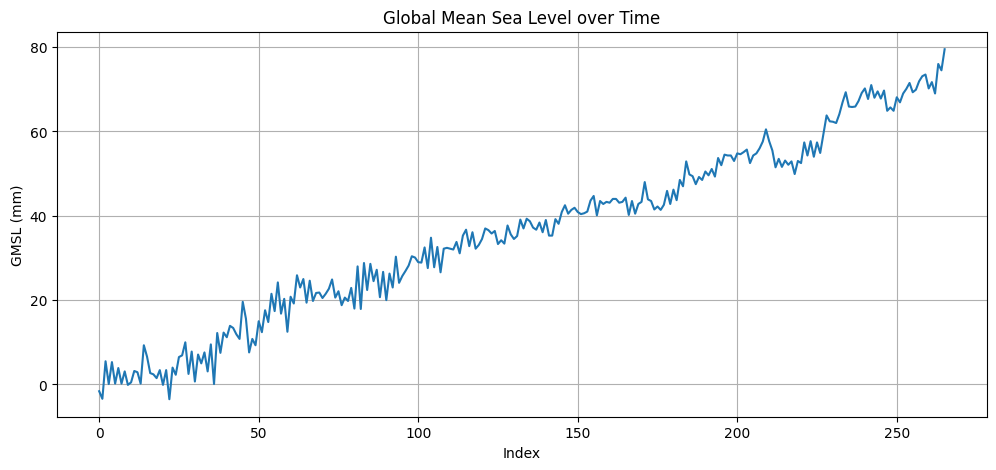

Dickey-Fuller Test:
ADF Statistic: -0.06527887022496182
p-value: 0.9527889449200404
Critical Value (1%): -3.4565688966099373
Critical Value (5%): -2.8730786194395455
Critical Value (10%): -2.5729189953388762
⚠️ The time series is **not** stationary.


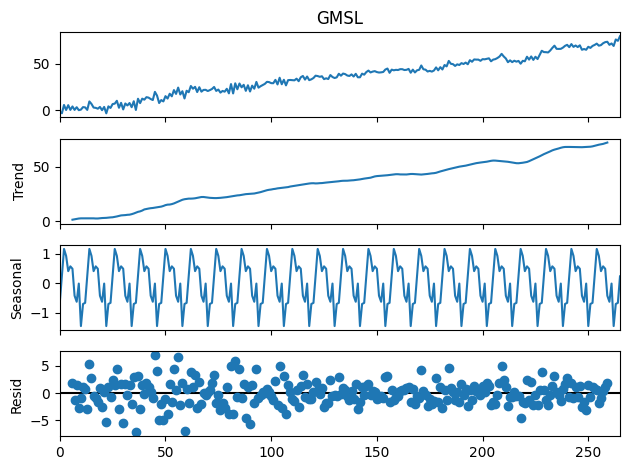

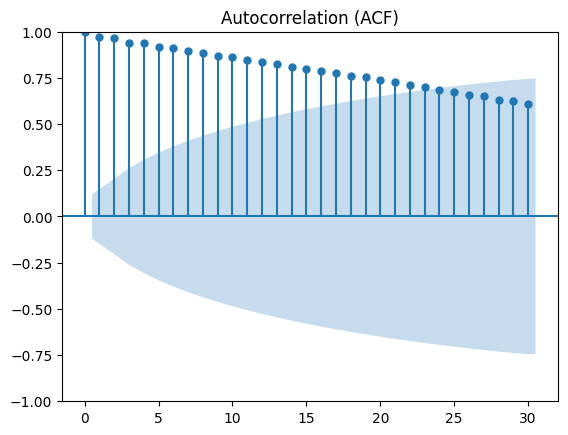

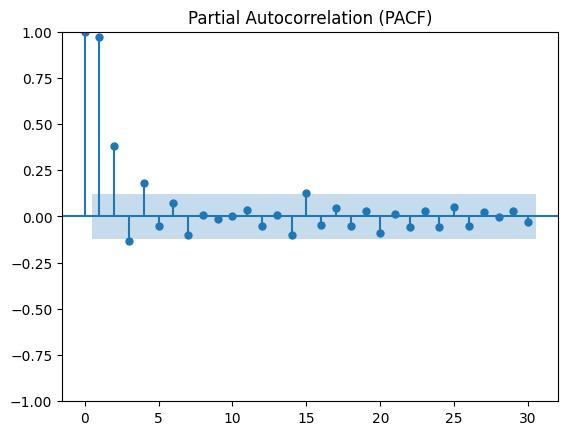

In [9]:
#tsplot(df_sea_level.GMSL, lags=30)
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 1. Load data (assuming you've already uploaded the CSV)
df = pd.read_csv('/Users/vyadav/Downloads/csiro_alt_gmsl_mo_2015_csv.csv')

# 2. Rename columns if needed and check structure
print(df.columns)
# For example, if it's ['Time', 'GMSL'], make sure the column names match
df.rename(columns=lambda x: x.strip(), inplace=True)

# 3. Time series plot
plt.figure(figsize=(12, 5))
plt.plot(df['GMSL'])
plt.title('Global Mean Sea Level over Time')
plt.xlabel('Index')
plt.ylabel('GMSL (mm)')
plt.grid()
plt.show()

# 4. Dickey-Fuller Test for Stationarity
result = adfuller(df['GMSL'].dropna())
print('Dickey-Fuller Test:')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print(f'Critical Value ({key}): {value}')

if result[1] < 0.05:
    print("✅ The time series is stationary.")
else:
    print("⚠️ The time series is **not** stationary.")

# 5. Decompose the time series (Additive)
decomposition = seasonal_decompose(df['GMSL'], model='additive', period=12)
decomposition.plot()
plt.show()

# 6. Autocorrelation Plot
plot_acf(df['GMSL'].dropna(), lags=30)
plt.title("Autocorrelation (ACF)")
plt.show()

# 7. Partial Autocorrelation Plot
plot_pacf(df['GMSL'].dropna(), lags=30)
plt.title("Partial Autocorrelation (PACF)")
plt.show()


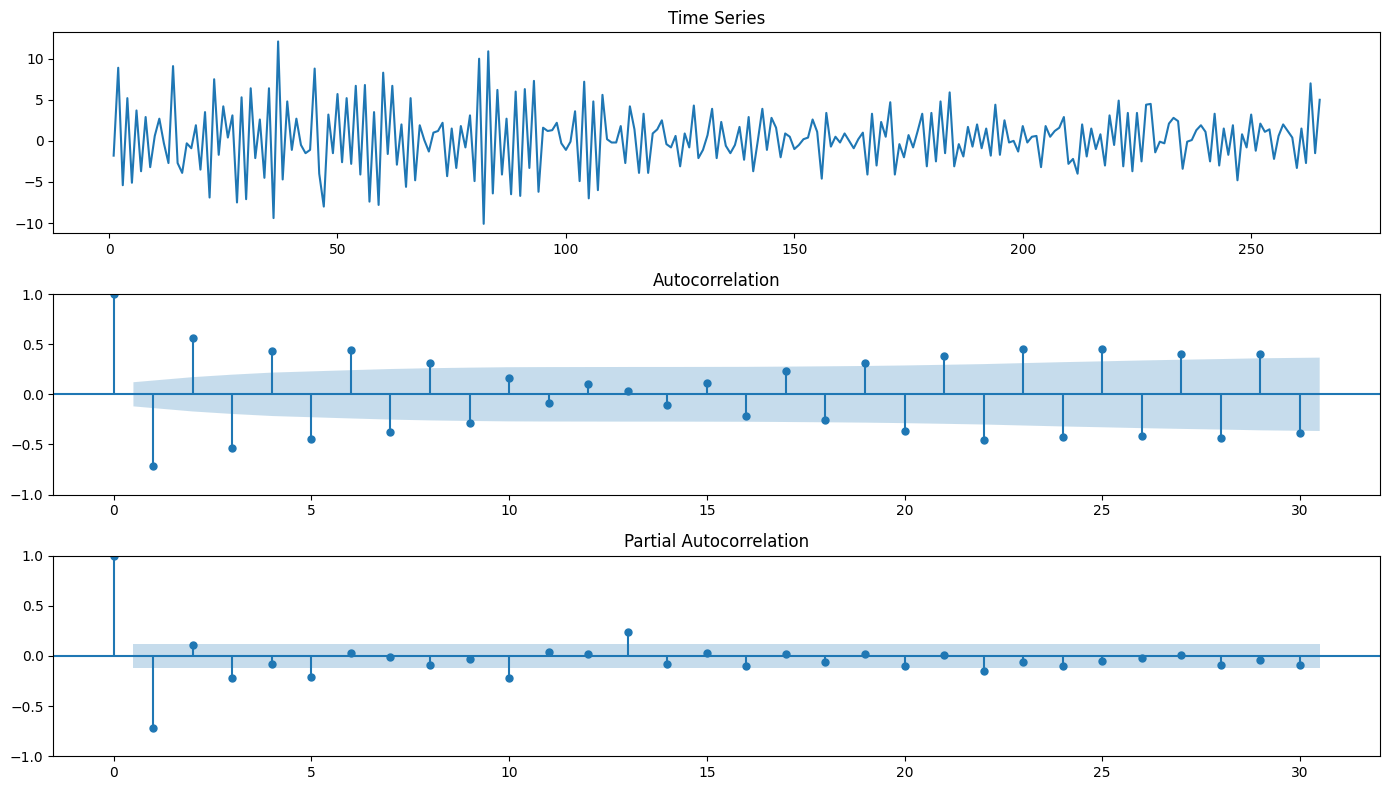

In [10]:
# Take the first difference to remove to make the process stationary
data_diff = df_sea_level.GMSL - df_sea_level.GMSL.shift(1)

tsplot(data_diff[1:], lags=30)   #start from 1 implies day0-day1

#lollipops within airwindow --> correlated

In [11]:
data_diffl = data_diff.to_list()
df_sea_level["GMSL_Diff"] = data_diffl
df_sea_level.drop("GMSL",inplace=True,axis=1)
df_sea_level = df_sea_level.dropna()
df_sea_level = df_sea_level.set_index("Time") 
df_sea_level.head()

,GMSL_Diff
Time,
1993-02-15,-1.8
1993-03-15,8.9
1993-04-15,-5.4
1993-05-15,5.2
1993-06-15,-5.1


In [12]:
import warnings
warnings.filterwarnings("ignore")

stepwise_model = auto_arima(df_sea_level, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.69 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1842.784, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1415.191, Time=0.10 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.71 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1459.361, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1380.006, Time=0.23 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=1351.169, Time=0.72 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.26 sec
 ARIMA(1,1,0)(2,1,2)[12]             : AIC=1353.166, Time=1.63 sec
 ARIMA(1,1,0)(1,1,2)[12]             : AIC=inf, Time=1.24 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=1.31 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=1326.452, Time=0.89 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=1327.528, Time=0.32 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1351.103, Time=0.35 sec
 ARIMA(2,1,0)(2,1,2)[12]             : AIC=1

In [13]:
n_test = 24
train_data = df_sea_level.iloc[:len(df_sea_level) - n_test]
test_data = df_sea_level.iloc[len(df_sea_level) - n_test:]

In [14]:
model_sea_level = SARIMAX(train_data['GMSL_Diff'],order=(3,1,0),seasonal_order=(2,1,1,12))
results_sea_level = model_sea_level.fit()

results_sea_level = model_sea_level.fit(disp=False)


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.49321D+00    |proj g|=  1.12858D-01

At iterate    5    f=  2.42691D+00    |proj g|=  7.64063D-02

At iterate   10    f=  2.42060D+00    |proj g|=  7.96376D-03

At iterate   15    f=  2.42052D+00    |proj g|=  1.47949D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     19     21      1     0     0   1.159D-05   2.421D+00
  F =   2.4205160359763709     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [15]:
start = len(train_data)
end = len(train_data) + len(test_data) - 1
predictions = results_sea_level.predict(start=start,end=end,dynamic=False,typ='levels').rename('SARIMA Predictions')

In [16]:
future_forecast_sar = predictions.to_list()

In [1]:
import plotly.io as pio
pio.renderers.default = 'browser'  # This will open your plot in the default web browser
fig.show()


NameError: name 'fig' is not defined

In [28]:
import plotly.graph_objects as go
import plotly.io as pio

# Set Plotly to open in the browser
pio.renderers.default = 'browser'

# Rebuild original GMSL from the differenced test data for comparison
actual_gmsl = test_data['GMSL_Diff'].cumsum() + df_sea_level['GMSL_Diff'].cumsum().iloc[len(train_data) - 1]
predicted_gmsl = future_forecast_df_sar['sealevel_prediction'].cumsum() + df_sea_level['GMSL_Diff'].cumsum().iloc[len(train_data) - 1]

# Create the plot
fig = go.Figure()

fig.add_trace(go.Scatter(x=actual_gmsl.index, y=actual_gmsl.values, mode='lines', name='Actual Sea Level', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=predicted_gmsl.index, y=predicted_gmsl.values, mode='lines', name='Predicted Sea Level', line=dict(color='red', dash='dash')))

fig.update_layout(
    title='Sea Level: Actual vs Forecasted (Restored)',
    xaxis_title='Time',
    yaxis_title='GMSL (mm)',
    legend=dict(x=0.01, y=0.99),
    template='plotly_white'
)

fig.show()
